In [19]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io
import os
import coco
import yolo
import vgg

In [2]:
repo_dir = project_name = 'COTSDataset' 
part1_single_objects = os.path.join(repo_dir, "Part 1 - Single Objects")
part2_multiple_objects = os.path.join(repo_dir, "Part 2 - Multiple Objects")
part3_complex_background = os.path.join(repo_dir, "Part 3 - Complex Background")

In [3]:
do_display = True
do_save = False
do_print = False

# COCO
coco_output_dir = "../Annotations/COCO_annotations"
coco_color = (0, 255, 0)

# YOLO
yolo_output_dir = "../Annotations/YOLO_annotations"
yolo_color = (0, 255, 0)

# VGG
vgg_output_dir = "../Annotations/VGG_annotations"
vgg_color = 'r'

In [4]:
def iou(annotation):
    gt = annotation['image']
    annotation_mask = np.zeros((annotation['height'], annotation['width']), dtype=np.uint8)
    cv2.drawContours(annotation_mask, annotation['contours'], -1, 255, -1)
    # resize annotation mask to gt size
    annotation_mask = cv2.resize(annotation_mask, (gt.shape[1], gt.shape[0]))

    # plot both on each other transparently, one blue one red
    # plt.figure()
    # plt.rcParams['figure.figsize'] = [20, 10]
    # plt.imshow(gt, cmap='Blues', alpha=0.5)
    # plt.imshow(annotation_mask, cmap='Reds', alpha=0.5)
    # plt.xticks([])
    # plt.yticks([])
    # plt.show()

    intersection = np.logical_and(gt, annotation_mask)
    union = np.logical_or(gt, annotation_mask)
    return np.sum(intersection) / np.sum(union)

In [5]:
# Import coco
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
import skimage.io as io

In [6]:
ann_file = 'Evaluation/instances_train2017.json'
coco_data = COCO(ann_file)

loading annotations into memory...
Done (t=48.13s)
creating index...
index created!


In [8]:
coco_data

In [9]:
coco_annotations = coco_data.loadAnns(coco_data.getAnnIds())

In [50]:
coco_annotations

[{'segmentation': [[239.97,
    260.24,
    222.04,
    270.49,
    199.84,
    253.41,
    213.5,
    227.79,
    259.62,
    200.46,
    274.13,
    202.17,
    277.55,
    210.71,
    249.37,
    253.41,
    237.41,
    264.51,
    242.54,
    261.95,
    228.87,
    271.34]],
  'area': 2765.1486500000005,
  'iscrowd': 0,
  'image_id': 558840,
  'bbox': [199.84, 200.46, 77.71, 70.88],
  'category_id': 58,
  'id': 156},
 {'segmentation': [[247.71,
    354.7,
    253.49,
    346.99,
    276.63,
    337.35,
    312.29,
    333.49,
    364.34,
    331.57,
    354.7,
    327.71,
    369.16,
    325.78,
    376.87,
    333.49,
    383.61,
    330.6,
    379.76,
    321.93,
    365.3,
    320.0,
    356.63,
    317.11,
    266.02,
    331.57,
    260.24,
    334.46,
    260.24,
    337.35,
    242.89,
    338.31,
    234.22,
    338.31,
    234.22,
    348.92,
    239.04,
    353.73,
    248.67,
    355.66,
    252.53,
    353.73]],
  'area': 1545.4213000000007,
  'iscrowd': 0,
  'image_id

In [10]:
cats = coco_data.loadCats(coco_data.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
appliance vehicle accessory indoor kitchen furniture animal person electronic outdoor sports food


In [150]:
# get all images containing given categories, select one at random
catIds = coco_data.getCatIds(catNms=['laptop', 'book']);
imgIds = coco_data.getImgIds(catIds=catIds);
# imgIds = coco_data.getImgIds(imgIds = [324158])
img = coco_data.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

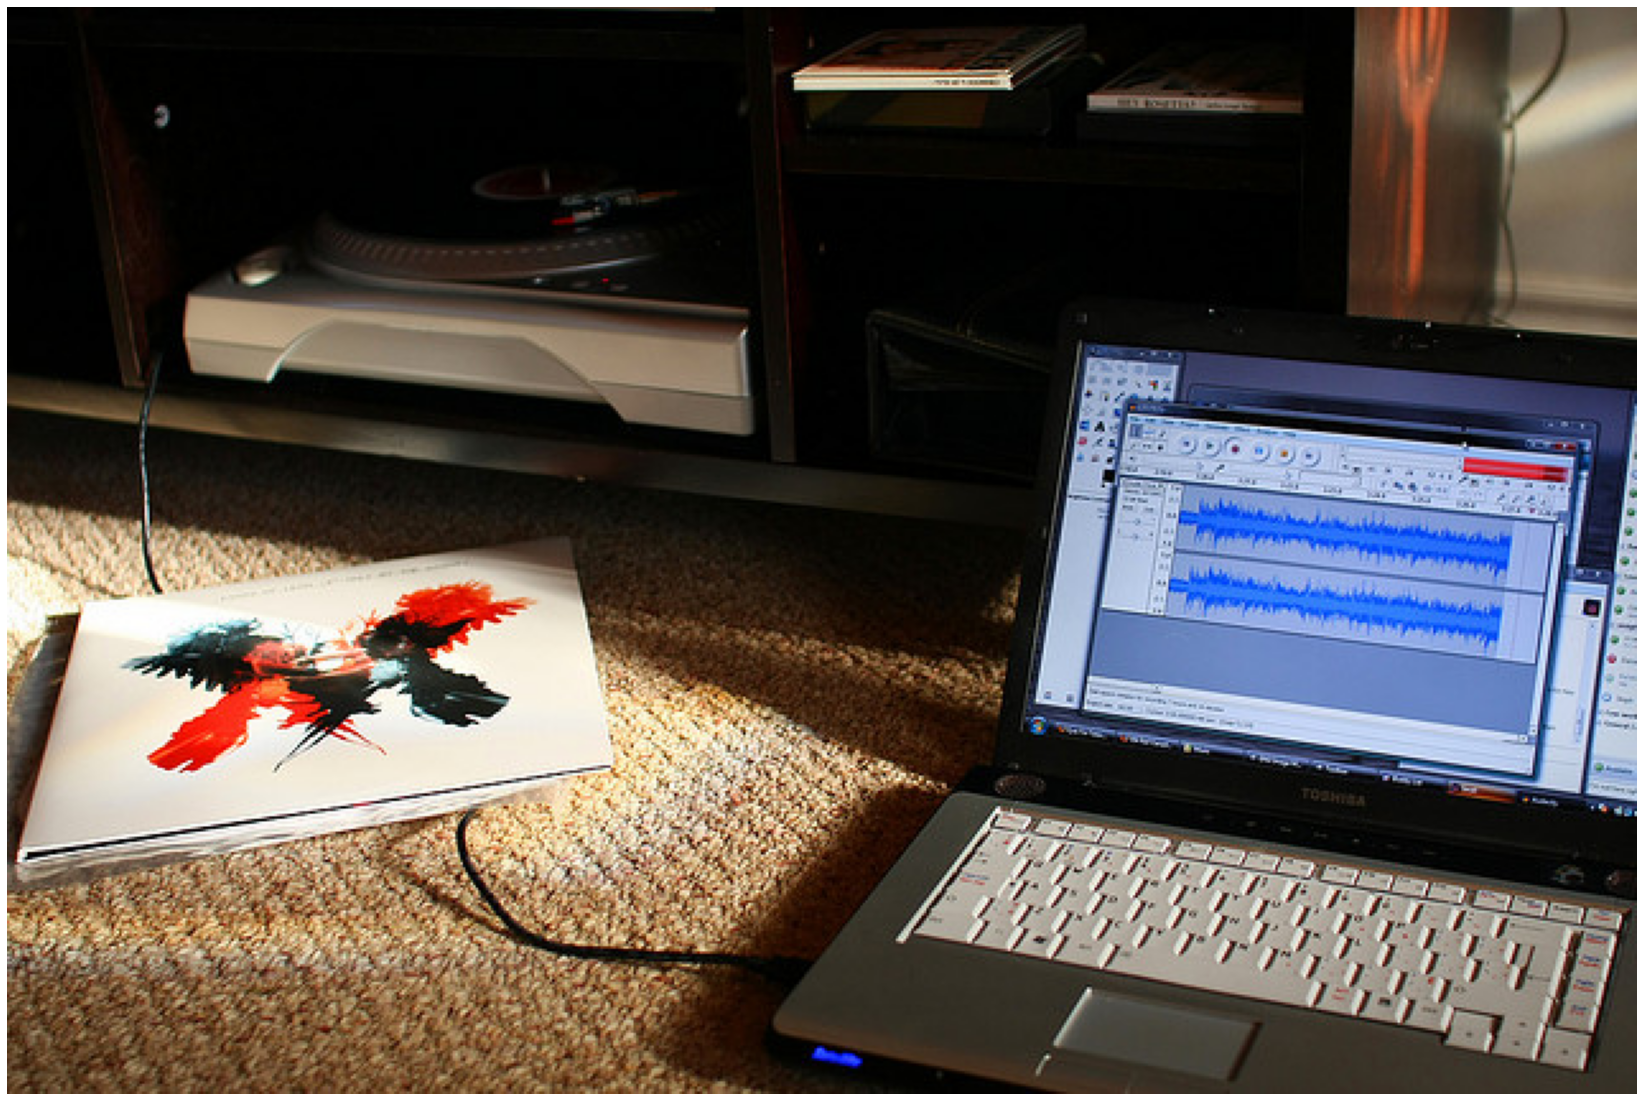

In [151]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.rcParams['figure.figsize'] = [40, 20]
plt.imshow(I)
plt.show()

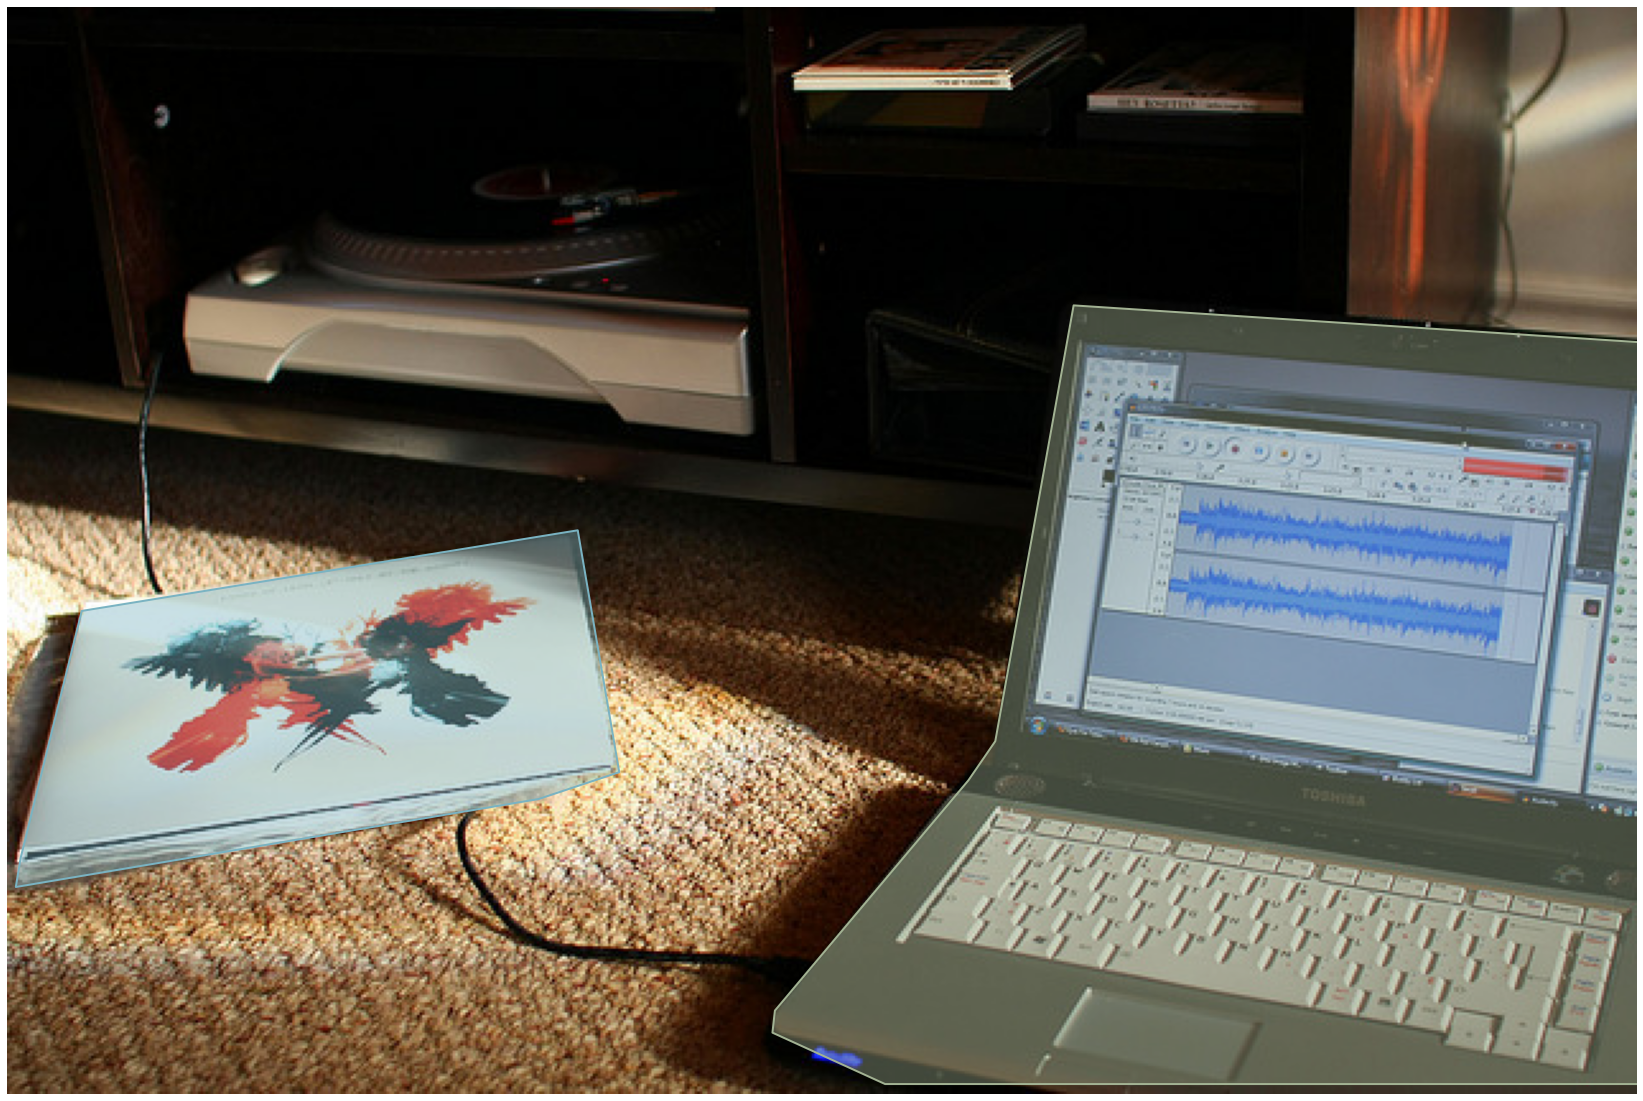

In [152]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco_data.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_data.loadAnns(annIds)
coco_data.showAnns(anns)

In [199]:
anns[0]['segmentation']

[[158.35,
  305.37,
  174.7,
  314.84,
  179.87,
  320.0,
  184.17,
  318.28,
  192.78,
  306.23,
  194.5,
  287.3,
  199.66,
  274.39,
  214.29,
  264.06,
  231.5,
  259.76,
  255.6,
  257.18,
  268.51,
  258.04,
  277.98,
  255.46,
  289.16,
  241.69,
  290.88,
  232.22,
  300.35,
  232.22,
  312.4,
  234.8,
  327.03,
  252.87,
  333.05,
  260.62,
  319.28,
  268.37,
  307.24,
  258.9,
  298.63,
  274.39,
  290.88,
  305.37,
  309.82,
  326.03,
  321.01,
  337.21,
  324.45,
  345.82,
  318.42,
  345.82,
  304.65,
  333.77,
  297.77,
  330.33,
  292.61,
  337.21,
  281.42,
  342.38,
  275.39,
  337.21,
  283.14,
  331.19,
  292.61,
  323.44,
  282.28,
  320.0,
  275.39,
  313.98,
  269.37,
  311.4,
  257.32,
  309.67,
  245.27,
  305.37,
  236.67,
  300.21,
  243.55,
  316.56,
  246.13,
  326.89,
  244.41,
  338.94,
  251.3,
  348.4,
  259.04,
  359.59,
  263.35,
  366.47,
  249.58,
  368.2,
  240.97,
  359.59,
  234.95,
  350.12,
  234.08,
  335.49,
  232.36,
  324.31,
  224.62,
  31

In [211]:
c

[0.840886120839129, 0.847646317942486, 0.4547036750750652]

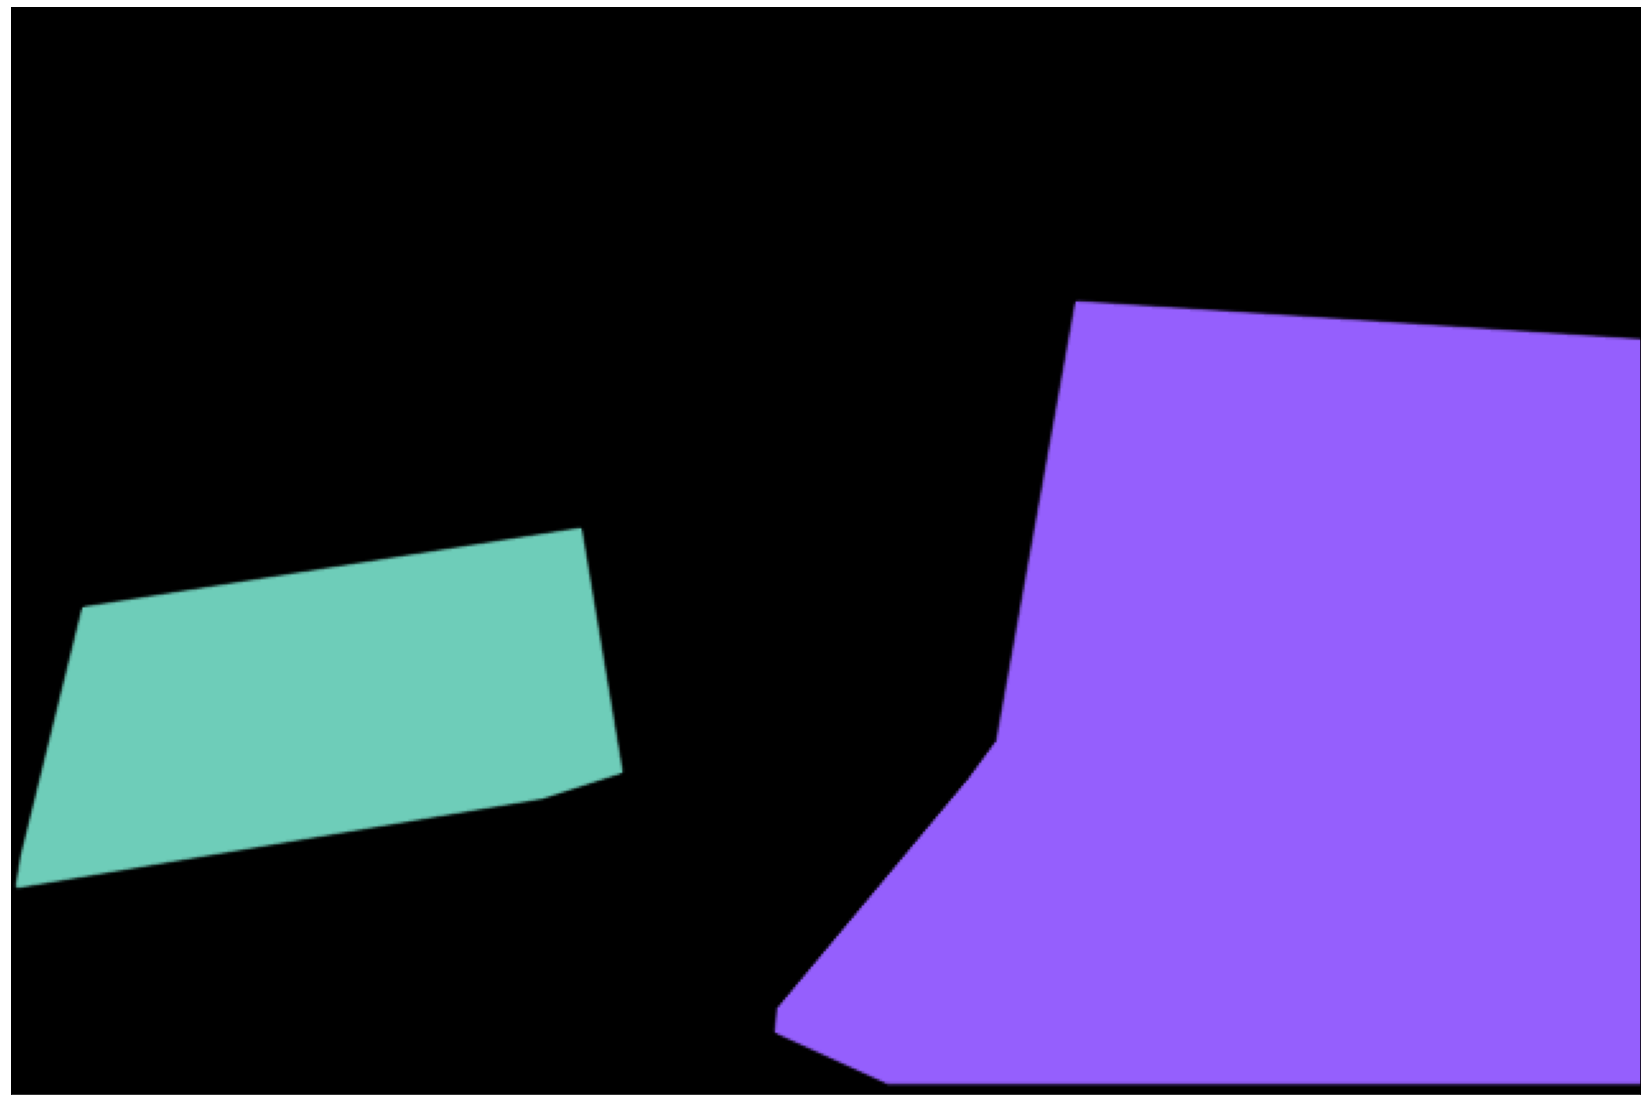

In [153]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

# put anns on black background
anns_mask = np.zeros((img['height'], img['width']), dtype=np.uint8)
anns_mask = cv2.cvtColor(anns_mask, cv2.COLOR_GRAY2RGB)

plt.figure()
polygons = []
color = []

for ann in anns:
    c = (np.random.random((1, 3))*256).tolist()[0]
    for seg in ann['segmentation']:
        cv2.drawContours(anns_mask, [np.array(seg).reshape((-1, 2)).astype(np.int32)], -1, c, thickness=cv2.FILLED, lineType=cv2.LINE_AA)

plt.rcParams['figure.figsize'] = [40, 20]
plt.imshow(anns_mask)
plt.xticks([])
plt.yticks([])
plt.show()

In [38]:
name = img['file_name']

In [39]:
name

'000000378906.jpg'

In [44]:
plt.savefig('./Evaluation/COCO/masks/' + name)

<Figure size 2880x1440 with 0 Axes>

In [9]:
# coco_annotations = coco_data.loadAnns(coco_data.getAnnIds())

# # Merge annotations with same image id
# merged_annotations = {}
# for annotation in coco_annotations:
#     # print(merged_annotations)
#     if annotation['image_id'] in merged_annotations:
#         merged_annotations[annotation['image_id']]['segmentation'].extend(annotation['segmentation'])
#     else:
#         merged_annotations[annotation['image_id']] = annotation

In [126]:
from random import randint
rand_id = randint(0, len(coco_annotations))
rand_id = coco_annotations[rand_id]['image_id']

In [127]:
rand_id

138975

In [78]:
coco_annotations

[{'segmentation': [[239.97,
    260.24,
    222.04,
    270.49,
    199.84,
    253.41,
    213.5,
    227.79,
    259.62,
    200.46,
    274.13,
    202.17,
    277.55,
    210.71,
    249.37,
    253.41,
    237.41,
    264.51,
    242.54,
    261.95,
    228.87,
    271.34]],
  'area': 2765.1486500000005,
  'iscrowd': 0,
  'image_id': 558840,
  'bbox': [199.84, 200.46, 77.71, 70.88],
  'category_id': 58,
  'id': 156},
 {'segmentation': [[247.71,
    354.7,
    253.49,
    346.99,
    276.63,
    337.35,
    312.29,
    333.49,
    364.34,
    331.57,
    354.7,
    327.71,
    369.16,
    325.78,
    376.87,
    333.49,
    383.61,
    330.6,
    379.76,
    321.93,
    365.3,
    320.0,
    356.63,
    317.11,
    266.02,
    331.57,
    260.24,
    334.46,
    260.24,
    337.35,
    242.89,
    338.31,
    234.22,
    338.31,
    234.22,
    348.92,
    239.04,
    353.73,
    248.67,
    355.66,
    252.53,
    353.73]],
  'area': 1545.4213000000007,
  'iscrowd': 0,
  'image_id

In [109]:
annotation

{'segmentation': {'counts': [4556,
   9,
   628,
   13,
   623,
   18,
   572,
   24,
   3,
   42,
   570,
   26,
   1,
   43,
   569,
   71,
   568,
   72,
   568,
   72,
   568,
   72,
   568,
   72,
   568,
   72,
   568,
   72,
   568,
   72,
   569,
   71,
   570,
   70,
   572,
   51,
   4,
   13,
   575,
   49,
   2,
   13,
   576,
   64,
   576,
   64,
   576,
   64,
   576,
   64,
   576,
   63,
   577,
   63,
   577,
   62,
   579,
   61,
   580,
   36,
   1,
   22,
   583,
   34,
   3,
   19,
   592,
   26,
   5,
   16,
   603,
   15,
   7,
   14,
   610,
   8,
   10,
   10,
   614,
   4,
   7671,
   6,
   633,
   8,
   631,
   10,
   629,
   12,
   628,
   12,
   628,
   12,
   628,
   12,
   627,
   13,
   626,
   14,
   625,
   15,
   600,
   2,
   22,
   16,
   599,
   2,
   15,
   24,
   583,
   1,
   14,
   1,
   16,
   24,
   584,
   1,
   13,
   2,
   14,
   25,
   585,
   1,
   9,
   6,
   9,
   1,
   2,
   25,
   1,
   1,
   585,
   3,
   2,
   11,
   8,
   25,
   

In [128]:
rand_annotations = []

# Find all annotations related to id_
for annotation in coco_annotations:
    if annotation['image_id'] == rand_id:
        # if annotation['id'] not in rand_annotations:
        #     rand_annotations[annotation['id']] = annotation
        # else:
        #     rand_annotations[annotation['id']].append(annotation)
        rand_annotations.append(annotation)

In [129]:
len(rand_annotations)

7

In [131]:
coco_data.loadImgs(id_)[0]

{'license': 3,
 'file_name': '000000273035.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000273035.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-17 22:45:33',
 'flickr_url': 'http://farm4.staticflickr.com/3516/3796891052_43aa014ed8_z.jpg',
 'id': 273035}

In [132]:
image.shape

(427, 640)

In [133]:
id_ = coco_annotations[rand_id]['image_id']
name = coco_data.loadImgs(id_)[0]['file_name']
# image = coco_data.annToMask(coco_annotations[rand_id])

height = coco_data.loadImgs(id_)[0]['height']
width = coco_data.loadImgs(id_)[0]['width']

image = np.zeros((height, width), dtype=np.uint8)

for annotation in rand_annotations:
    mask = coco_data.annToMask(annotation)
    mask = cv2.resize(mask, (width, height))

    try:
        image = np.logical_or(image, mask)
    except:
        pass


original = skimage.io.imread(coco_data.loadImgs(id_)[0]['coco_url'])

plt.figure()
plt.rcParams['figure.figsize'] = [20, 10]
plt.xticks([])
plt.yticks([])
plt.imshow(image)


# im = (id_, name, image, 'COCOEvaluation', 'COCO', './Evaluation/COCO/')

# annotation = coco.annotate(im, do_display=True, do_save=False, do_cvt=False, annotation_color=coco_color, epsilon=0.005, configuration=coco.POLY_APPROX)

# contours = annotation['contours']

# annotated_image = np.zeros((annotation['height'], annotation['width'], 3), dtype=np.uint8)
# cv2.drawContours(annotated_image, annotation['contours'], -1, (255, 0, 0), 3, cv2.LINE_AA)

plt.savefig('./Evaluation/COCO/masks/' + name)

c:\Users\matth\anaconda3\envs\coco\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


In [134]:
plt.figure()
plt.imshow(original)
plt.xticks([])
plt.yticks([])
plt.savefig('./Evaluation/COCO/original/' + name)

In [13]:
import matplotlib.pyplot as plt

In [14]:
original_mask = image

plt.figure()
plt.rcParams['figure.figsize'] = [20, 10]
plt.subplot(131)
plt.imshow(original)
plt.xticks([])
plt.yticks([])
plt.title('Original Image', fontsize=20)
plt.subplot(132)
image_rgba = cv2.cvtColor(original_mask, cv2.COLOR_GRAY2RGBA)
alpha = np.where(image == 0, 0, 255)
image_rgba[:, :, 0] = 0
image_rgba[:, :, 1] = 0
image_rgba[:, :, 2] = 255 
image_rgba[:, :, 3] = alpha

plt.imshow(original, alpha=1)
plt.imshow(image_rgba, alpha=0.5)

plt.xticks([])
plt.yticks([])
plt.title('Original Mask', fontsize=20)
plt.subplot(133)
# plot contours
plt.imshow(original_mask, cmap='gray')
# plt.imshow(annotated_image)
annotated_rgba = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGBA)
alpha = np.where(annotated_image == 0, 0, 255)
annotated_rgba[:, :, 0] = 255
annotated_rgba[:, :, 1] = 0
annotated_rgba[:, :, 2] = 0
annotated_rgba[:, :, 3] = alpha[:, :, 0]
plt.imshow(annotated_rgba, alpha=1)


plt.xticks([])
plt.yticks([])
plt.title('Annotated Mask', fontsize=20)
plt.show()
plt.savefig('test.jpeg')

c:\Users\matth\anaconda3\envs\coco\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [15]:
cv2.drawContours(annotated_image, annotation['contours'], -1, (255, 0, 0), 3, cv2.LINE_AA)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [16]:
annotation['contours']

[]

**IoU**

In [17]:
images = {}
ids = []

**PA**

In [18]:
len(images)

0

In [19]:
from time import time

start = time()

image_id = 0

epsilon = 0.005

coco_pa_ious = []

for i in range(200):
    id_ = coco_annotations[i]['image_id']

    if id_ not in ids:
        name = coco_data.loadImgs(id_)[0]['file_name']
        ids.append(id_)

        image = coco_data.annToMask(coco_annotations[id_])
        
        original = skimage.io.imread(coco_data.loadImgs(id_)[0]['coco_url'])
        images[id_] = original

        im = (id_, name, image, 'COCOEvaluation', 'COCO', './Evaluation/COCO/')

        annotation = coco.annotate(im, do_display=False, do_save=False, do_cvt=False, annotation_color=coco_color, epsilon=0.005, configuration=coco.POLY_APPROX)

        contours = annotation['contours']

        annotated_image = np.zeros((annotation['height'], annotation['width'], 3), dtype=np.uint8)
        cv2.drawContours(annotated_image, annotation['contours'], -1, (255, 0, 0), 3, cv2.LINE_AA)

        image_id += 1
        coco_pa_ious.append([name, iou(annotation)])

end = time()
print(f'PA time: {end - start}')


 Annotating image:  000000558840.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000200365.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000495357.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000116061.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000016164.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000205350.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000000074.jpg
--------

KeyboardInterrupt: 

In [ ]:
# Plot bar chart of ious, image on y axis, iou on x axis
plt.rcParams['figure.figsize'] = [10, 75]
plt.figure()

# sort ious descending
# ious.sort(key=lambda x: x[1], reverse=True)
plt.barh(np.arange(len(coco_pa_ious)), [x[1] for x in coco_pa_ious], align='center', color='slategrey')

# print values on bars on the right
for i, v in enumerate([x[1] for x in coco_pa_ious]):
    plt.text(v + 0.01, i - 0.2, str(round(v, 3)), color='k', fontsize=10)

# add image names to y axis
plt.yticks(np.arange(len(coco_pa_ious)), [x[0] for x in coco_pa_ious], fontsize=10)

# plot vertical line at average and median
plt.axvline(x=np.mean([x[1] for x in coco_pa_ious]), color='r', linestyle='--', linewidth=2)
plt.axvline(x=np.median([x[1] for x in coco_pa_ious]), color='b', linestyle='--', linewidth=2)

# add legend
average_legend = 'Average IoU (' + str(np.round(np.mean([x[1] for x in coco_pa_ious]), 3)) + ')'
median_legend = 'Median IoU (' + str(np.round(np.median([x[1] for x in coco_pa_ious]), 3)) + ')'
plt.legend([average_legend, median_legend], loc='upper right', fontsize=12)

plt.xlabel('IoU', fontsize=20)
plt.ylabel('Image', fontsize=20)
plt.title('IoU per Image - COCO (Polygon Approximation)', fontsize=20, fontweight='bold')

plt.show()
plt.savefig('./Figures/IoU per Image - COCO (Polygon Approximation).png')

c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


**KMC**

In [ ]:
coco_kmc_ious

[]

In [ ]:
len(ids)

168

In [ ]:
image_id = 0

epsilon = 0.005

coco_kmc_ious = []

for id_ in ids:
    name = coco_data.loadImgs(id_)[0]['file_name']

    image = coco_data.annToMask(coco_annotations[id_])
    
    # original = skimage.io.imread(coco_data.loadImgs(id_)[0]['coco_url'])
    original = images[id_]

    im = (id_, name, image, 'COCOEvaluation', 'COCO', './Evaluation/COCO/')

    annotation = coco.annotate(im, do_display=False, do_save=False, do_cvt=False, annotation_color=coco_color, epsilon=0.005, configuration=coco.K_MEANS_CLUSTER)

    contours = annotation['contours']

    annotated_image = np.zeros((annotation['height'], annotation['width'], 3), dtype=np.uint8)
    cv2.drawContours(annotated_image, annotation['contours'], -1, (255, 0, 0), 3, cv2.LINE_AA)

    image_id += 1
    coco_kmc_ious.append([name, iou(annotation)])


 Annotating image:  000000558840.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000200365.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000495357.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000116061.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000016164.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000205350.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000000074.jpg
--------

In [ ]:
# Plot bar chart of ious, image on y axis, iou on x axis
plt.rcParams['figure.figsize'] = [10, 75]
plt.figure()

# sort ious descending
# ious.sort(key=lambda x: x[1], reverse=True)
plt.barh(np.arange(len(coco_kmc_ious)), [x[1] for x in coco_kmc_ious], align='center', color='slategrey')

# print values on bars on the right
for i, v in enumerate([x[1] for x in coco_kmc_ious]):
    plt.text(v + 0.01, i - 0.2, str(round(v, 3)), color='k', fontsize=10)

# add image names to y axis
plt.yticks(np.arange(len(coco_kmc_ious)), [x[0] for x in coco_kmc_ious], fontsize=10)

# make x axis span 0 to 1
plt.xlim(0, 1)

# plot vertical line at average and median
plt.axvline(x=np.mean([x[1] for x in coco_kmc_ious]), color='r', linestyle='--', linewidth=2)
plt.axvline(x=np.median([x[1] for x in coco_kmc_ious]), color='b', linestyle='--', linewidth=2)

# add legend
average_legend = 'Average IoU (' + str(np.round(np.mean([x[1] for x in coco_kmc_ious]), 3)) + ')'
median_legend = 'Median IoU (' + str(np.round(np.median([x[1] for x in coco_kmc_ious]), 3)) + ')'
plt.legend([average_legend, median_legend], loc='upper right', fontsize=12)

plt.xlabel('IoU', fontsize=20)
plt.ylabel('Image', fontsize=20)
plt.title('IoU per Image - COCO (K-Means Clustering)', fontsize=20, fontweight='bold')

plt.show()
plt.savefig('./Figures/IoU per Image - COCO (K-Means Clustering).png')

c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


**SAM**

In [ ]:
# Dependencies required for segment-anything
# %pip install git+https://github.com/facebookresearch/segment-anything.git
# %pip install torch torchvision
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import torch
torch.cuda.empty_cache()
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Segment-anything model
# Downloading model checkpoint:
# Utilise the following link: https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
# Place the downloaded checkpoint in a new directory named Sam_checkpoints
sam_checkpoint = "Sam_checkpoints/sam_vit_b_01ec64.pth"
model_type = "vit_b"
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_batch=16
)

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [ ]:
ids[67]

555669

In [ ]:
masks = {}

from time import time
start = time()

for id_ in ids[68:]:
    name = coco_data.loadImgs(id_)[0]['file_name']

    image = coco_data.annToMask(coco_annotations[id_])
    
    # original = skimage.io.imread(coco_data.loadImgs(id_)[0]['coco_url'])

    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    mask = mask_generator.generate(image)

    sorted_anns = sorted(mask, key=(lambda x: x['area']), reverse=True)
    img = np.zeros((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))

    for ann in sorted_anns:
        # skip first anotation
        if ann is sorted_anns[0]:
            continue
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = 1

    img[:, :, 3] = 1

    # save
    plt.imsave(f'Evaluation/COCO/segment-anything/{name}', img)

    masks[name] = mask
    # masks.append(mask)
    print(f'SAM Mask generated for {name} -- Time elapsed: {time() - start}')

end = time()
print(f'Total time elapsed: {end - start}')


SAM Mask generated for 000000270744.jpg -- Time elapsed: 16.154730081558228
SAM Mask generated for 000000351840.jpg -- Time elapsed: 23.64141345024109
SAM Mask generated for 000000307993.jpg -- Time elapsed: 32.60654854774475
SAM Mask generated for 000000145544.jpg -- Time elapsed: 39.35654616355896
SAM Mask generated for 000000184771.jpg -- Time elapsed: 48.633782625198364
SAM Mask generated for 000000187349.jpg -- Time elapsed: 57.316757678985596
SAM Mask generated for 000000282134.jpg -- Time elapsed: 65.60446286201477
SAM Mask generated for 000000378561.jpg -- Time elapsed: 72.0874617099762
SAM Mask generated for 000000007125.jpg -- Time elapsed: 78.67846131324768
SAM Mask generated for 000000386165.jpg -- Time elapsed: 87.48154258728027
SAM Mask generated for 000000346965.jpg -- Time elapsed: 94.96954274177551
SAM Mask generated for 000000559950.jpg -- Time elapsed: 102.7700686454773
SAM Mask generated for 000000459566.jpg -- Time elapsed: 111.80018615722656
SAM Mask generated for

In [ ]:
masks['000000270744.jpg'][0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 270760,
 'bbox': [0, 2, 639, 423],
 'predicted_iou': 1.0405972003936768,
 'point_coords': [[490.0, 153.453125]],
 'stability_score': 0.9976194500923157,
 'crop_box': [0, 0, 640, 427]}

In [ ]:
coco_annotations[id_]

{'segmentation': [[427.76,
   162.28,
   433.3,
   163.51,
   438.42,
   166.79,
   444.78,
   168.43,
   448.47,
   176.43,
   450.72,
   181.14,
   451.34,
   182.78,
   454.21,
   181.96,
   451.75,
   172.53,
   451.54,
   169.45,
   454.21,
   168.43,
   462.0,
   169.25,
   465.9,
   170.89,
   471.23,
   173.76,
   477.17,
   183.4,
   477.58,
   188.11,
   475.53,
   188.73,
   473.28,
   180.32,
   468.97,
   174.38,
   469.59,
   181.96,
   476.76,
   193.44,
   477.79,
   195.9,
   474.3,
   196.72,
   472.66,
   191.8,
   465.69,
   184.22,
   465.28,
   191.39,
   460.77,
   198.77,
   454.21,
   198.57,
   454.21,
   195.29,
   459.34,
   194.67,
   461.8,
   189.75,
   459.95,
   183.6,
   441.5,
   184.22,
   439.24,
   198.77,
   433.09,
   198.77,
   432.89,
   196.11,
   436.58,
   194.26,
   437.4,
   185.24,
   432.07,
   186.88,
   426.33,
   195.49,
   424.07,
   193.03,
   432.07,
   184.01,
   434.53,
   178.07,
   431.25,
   171.51,
   423.45,
   176.43,
   42

In [ ]:
masks[name][0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 270760,
 'bbox': [0, 2, 639, 423],
 'predicted_iou': 1.0405972003936768,
 'point_coords': [[490.0, 153.453125]],
 'stability_score': 0.9976194500923157,
 'crop_box': [0, 0, 640, 427]}

In [ ]:
masks[name][0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 270760,
 'bbox': [0, 2, 639, 423],
 'predicted_iou': 1.0405972003936768,
 'point_coords': [[490.0, 153.453125]],
 'stability_score': 0.9976194500923157,
 'crop_box': [0, 0, 640, 427],
 'image_id': 270744}

In [ ]:
for mask in masks:
    print(mask['segmentation'].shape)

TypeError: string indices must be integers

In [ ]:
coco_annotations[id_]

{'segmentation': [[427.76,
   162.28,
   433.3,
   163.51,
   438.42,
   166.79,
   444.78,
   168.43,
   448.47,
   176.43,
   450.72,
   181.14,
   451.34,
   182.78,
   454.21,
   181.96,
   451.75,
   172.53,
   451.54,
   169.45,
   454.21,
   168.43,
   462.0,
   169.25,
   465.9,
   170.89,
   471.23,
   173.76,
   477.17,
   183.4,
   477.58,
   188.11,
   475.53,
   188.73,
   473.28,
   180.32,
   468.97,
   174.38,
   469.59,
   181.96,
   476.76,
   193.44,
   477.79,
   195.9,
   474.3,
   196.72,
   472.66,
   191.8,
   465.69,
   184.22,
   465.28,
   191.39,
   460.77,
   198.77,
   454.21,
   198.57,
   454.21,
   195.29,
   459.34,
   194.67,
   461.8,
   189.75,
   459.95,
   183.6,
   441.5,
   184.22,
   439.24,
   198.77,
   433.09,
   198.77,
   432.89,
   196.11,
   436.58,
   194.26,
   437.4,
   185.24,
   432.07,
   186.88,
   426.33,
   195.49,
   424.07,
   193.03,
   432.07,
   184.01,
   434.53,
   178.07,
   431.25,
   171.51,
   423.45,
   176.43,
   42

In [ ]:
coco_sam_ious = []

for id_ in ids:
    # id_ = coco_annotations[i]['image_id']
    name = coco_data.loadImgs(id_)[0]['file_name']

    image = coco_data.annToMask(coco_annotations[id_])
    
    original = skimage.io.imread(coco_data.loadImgs(id_)[0]['coco_url'])
    # original = images[id_]

    annotation = cv2.imread('./Evaluation/COCO/segment-anything/' + name)
    annotation = cv2.cvtColor(annotation, cv2.COLOR_BGR2GRAY)

    # annotation = mask_generator.generate(original)
        
    intersection = np.logical_and(image, annotation)
    union = np.logical_or(image, annotation)
    iou_score = np.sum(intersection) / np.sum(union)

    coco_sam_ious.append([name, iou_score])

    print(f'{name}:{iou_score}')

    # Comparison
    original_mask = image
    # original_mask = cv2.resize  (original_mask, (original.shape[1], original.shape[0]))

    plt.figure()
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.subplot(131)
    plt.imshow(original)
    plt.xticks([])
    plt.yticks([])
    plt.title('Original Image', fontsize=20)
    plt.subplot(132)
    image_rgba = cv2.cvtColor(original_mask, cv2.COLOR_GRAY2RGBA)
    alpha = np.where(image == 0, 0, 255)
    image_rgba[:, :, 0] = 0
    image_rgba[:, :, 1] = 0
    image_rgba[:, :, 2] = 255 
    image_rgba[:, :, 3] = alpha
    image_rgba = cv2.resize(image_rgba, (original.shape[1], original.shape[0]))

    plt.imshow(original, alpha=1)
    plt.imshow(image_rgba, alpha=0.5)

    plt.xticks([])
    plt.yticks([])
    plt.title('Original Mask', fontsize=20)
    plt.subplot(133)
    # plot contours
    plt.imshow(original_mask, cmap='gray')
    # plt.imshow(annotated_image)
    annotated_rgba = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGBA)
    alpha = np.where(annotated_image == 0, 0, 255)
    annotated_rgba[:, :, 0] = 255
    annotated_rgba[:, :, 1] = 0
    annotated_rgba[:, :, 2] = 0
    annotated_rgba[:, :, 3] = alpha[:, :, 0]

    annotated_rgba = cv2.resize(annotated_rgba, (original.shape[1], original.shape[0]))

    plt.imshow(annotation, alpha=1)


    plt.xticks([])
    plt.yticks([])
    plt.title('Annotated Mask', fontsize=20)
    plt.show()
    plt.savefig('./Evaluation/COCO/segment-anything/comparisons/' + name)


000000558840.jpg:0.7413441955193483


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:70: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


000000200365.jpg:0.6291512915129152
000000495357.jpg:0.9609868805438997
000000116061.jpg:0.16739947691756868
000000016164.jpg:0.8042468480424685
000000205350.jpg:0.015118167057550064
000000000074.jpg:0.7407444900792503
000000212545.jpg:0.7205793602896802
000000514915.jpg:0.7952468007312614
000000154589.jpg:0.7761461318051576
000000471175.jpg:0.0
000000225919.jpg:0.7862306368330465
000000400728.jpg:0.924424741397509
000000194306.jpg:0.826362484157161
000000383780.jpg:0.7198992443324937
000000580255.jpg:0.6661059714045416
000000370210.jpg:0.921100583090379
000000075283.jpg:0.0
000000325969.jpg:0.7360980207351555
000000251716.jpg:0.0
000000013882.jpg:0.7339901477832512
000000185156.jpg:0.6351931330472103
000000176697.jpg:0.0
000000376608.jpg:0.3641304347826087
000000178939.jpg:0.07911004361291954
000000173350.jpg:0.8752886836027713
000000026654.jpg:0.0
000000346071.jpg:0.9676513253329817
000000158497.jpg:0.6503613118399111
000000408307.jpg:0.750690563371234
000000252203.jpg:0.715907767555

In [ ]:
# Plot bar chart of ious, image on y axis, iou on x axis
plt.rcParams['figure.figsize'] = [10, 75]
plt.figure()

# sort ious descending
# ious.sort(key=lambda x: x[1], reverse=True)
plt.barh(np.arange(len(coco_sam_ious)), [x[1] for x in coco_sam_ious], align='center', color='slategrey')

# print values on bars on the right
for i, v in enumerate([x[1] for x in coco_sam_ious]):
    plt.text(v + 0.01, i - 0.2, str(round(v, 3)), color='k', fontsize=10)

# add image names to y axis
plt.yticks(np.arange(len(coco_sam_ious)), [x[0] for x in coco_sam_ious], fontsize=10)

# plot vertical line at average and median
plt.axvline(x=np.mean([x[1] for x in coco_sam_ious]), color='r', linestyle='--', linewidth=2)
plt.axvline(x=np.median([x[1] for x in coco_sam_ious]), color='b', linestyle='--', linewidth=2)

# add legend
average_legend = 'Average IoU (' + str(np.round(np.mean([x[1] for x in coco_sam_ious]), 3)) + ')'
median_legend = 'Median IoU (' + str(np.round(np.median([x[1] for x in coco_sam_ious]), 3)) + ')'
plt.legend([average_legend, median_legend], loc='upper right', fontsize=12)

plt.xlabel('IoU', fontsize=20)
plt.ylabel('Image', fontsize=20)
plt.title('IoU per Image (Segment Anything - COCO)', fontsize=20, fontweight='bold')

plt.show()
plt.savefig('./Figures/IoU per Image - COCO (Segment Anything).png')

c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


**Compactness**

In [ ]:
# compactness
def compactness(annotation):
    mask = cv2.drawContours(np.zeros((annotation['height'], annotation['width']), dtype=np.uint8), annotation['contours'], -1, 255, -1)
    bounding_rect = cv2.boundingRect(mask)
    box = bounding_rect[2] * bounding_rect[3]
    
    area = np.sum(mask != 0)

    return area / box

In [ ]:
# def compactness(annotation):
#     # area of annotation
#     area = annotation['image'].shape[0] * annotation['image'].shape[1]

#     # perimeter of annotation
#     perimeter = 0
#     for contour in annotation['contours']:
#         perimeter += cv2.arcLength(contour, True)

#     return (perimeter ** 2) / area

**PA**

In [ ]:
from time import time

start = time()

epsilon = 0.005

coco_pa_compactness = []

for id_ in ids:
    name = coco_data.loadImgs(id_)[0]['file_name']
    image = coco_data.annToMask(coco_annotations[id_])
    
    # original = skimage.io.imread(coco_data.loadImgs(id_)[0]['coco_url'])
    original = images[id_]

    im = (id_, name, image, 'COCOEvaluation', 'COCO', './Evaluation/COCO/')

    annotation = coco.annotate(im, do_display=False, do_save=True, do_cvt=False, annotation_color=coco_color, epsilon=0.005, configuration=coco.POLY_APPROX)

    score = compactness(annotation)
    if score < np.inf:
        coco_pa_compactness.append([name, score])

end = time()
print(f'PA time: {end - start}')


 Annotating image:  000000558840.jpg
 Succesfully saved image:  000000558840.jpg 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000200365.jpg
 Succesfully saved image:  000000200365.jpg 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000495357.jpg
 Succesfully saved image:  000000495357.jpg 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000116061.jpg
 Succesfully saved image:  000000116061.jpg 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000016164.jpg
 Succesfully saved image:  000000016164.jpg 


-------------------------------------------------------------------------------------------

c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


 000000047263.jpg
 Succesfully saved image:  000000047263.jpg 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000519838.jpg
 Succesfully saved image:  000000519838.jpg 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000283119.jpg
 Succesfully saved image:  000000283119.jpg 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000369190.jpg
 Succesfully saved image:  000000369190.jpg 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000458424.jpg
 Succesfully saved image:  000000458424.jpg 


---------------------------------------------------------------------------------------------------------------

In [ ]:
# Plot bar chart of compactness, image on y axis, iou on x axis
plt.rcParams['figure.figsize'] = [10, 35]
plt.figure()

# sort ious descending
# ious.sort(key=lambda x: x[1], reverse=True)
plt.barh(np.arange(len(coco_pa_compactness)), [x[1] for x in coco_pa_compactness], align='center', color='slategrey')

# print values on bars on the right
for i, v in enumerate([x[1] for x in coco_pa_compactness]):
    plt.text(v + 0.01, i - 0.2, str(round(v, 3)), color='k', fontsize=10)

# add image names to y axis
plt.yticks(np.arange(len(coco_pa_compactness)), [x[0] for x in coco_pa_compactness], fontsize=10)

# plot vertical line at average and median
plt.axvline(x=np.mean([x[1] for x in coco_pa_compactness]), color='r', linestyle='--', linewidth=2)
plt.axvline(x=np.median([x[1] for x in coco_pa_compactness]), color='b', linestyle='--', linewidth=2)

# add legend
average_legend = 'Average Compactness (' + str(np.round(np.mean([x[1] for x in coco_pa_compactness]), 3)) + ')'
median_legend = 'Median Compactness (' + str(np.round(np.median([x[1] for x in coco_pa_compactness]), 3)) + ')'
plt.legend([average_legend, median_legend], loc='upper right', fontsize=12)

plt.xlabel('Compactness', fontsize=20)
plt.ylabel('Image', fontsize=20)
plt.title('Compactness per Image (Polygon Approximation)', fontsize=20, fontweight='bold')

plt.show()

plt.savefig('./Figures/Compactness per Image - COCO (Polygon Approximation).png')

c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


**KMC**

In [ ]:
from time import time

start = time()

epsilon = 0.005

coco_kmc_compactness = []

for id_ in ids:
    name = coco_data.loadImgs(id_)[0]['file_name']
    image = coco_data.annToMask(coco_annotations[id_])
    
    # original = skimage.io.imread(coco_data.loadImgs(id_)[0]['coco_url'])
    original = images[id_]

    im = (id_, name, image, 'COCOEvaluation', 'COCO', './Evaluation/COCO/')

    annotation = coco.annotate(im, do_display=False, do_save=False, do_cvt=False, annotation_color=coco_color, epsilon=0.005, configuration=coco.K_MEANS_CLUSTER)

    score = compactness(annotation)
    if score < np.inf:
        coco_kmc_compactness.append([name, score])

end = time()
print(f'PA time: {end - start}')


 Annotating image:  000000558840.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000200365.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000495357.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000116061.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000016164.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000205350.jpg
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  000000000074.jpg
--------

In [ ]:
# Plot bar chart of compactness, image on y axis, iou on x axis
plt.rcParams['figure.figsize'] = [10, 35]
plt.figure()

# sort ious descending
# ious.sort(key=lambda x: x[1], reverse=True)
plt.barh(np.arange(len(coco_kmc_compactness)), [x[1] for x in coco_kmc_compactness], align='center', color='slategrey')

# print values on bars on the right
for i, v in enumerate([x[1] for x in coco_kmc_compactness]):
    plt.text(v + 0.01, i - 0.2, str(round(v, 3)), color='k', fontsize=10)

# add image names to y axis
plt.yticks(np.arange(len(coco_kmc_compactness)), [x[0] for x in coco_kmc_compactness], fontsize=10)

# plot vertical line at average and median
plt.axvline(x=np.mean([x[1] for x in coco_kmc_compactness]), color='r', linestyle='--', linewidth=2)
plt.axvline(x=np.median([x[1] for x in coco_kmc_compactness]), color='b', linestyle='--', linewidth=2)

# add legend
average_legend = 'Average Compactness (' + str(np.round(np.mean([x[1] for x in coco_kmc_compactness]), 3)) + ')'
median_legend = 'Median Compactness (' + str(np.round(np.median([x[1] for x in coco_kmc_compactness]), 3)) + ')'
plt.legend([average_legend, median_legend], loc='upper right', fontsize=12)

plt.xlabel('Compactness', fontsize=20)
plt.ylabel('Image', fontsize=20)
plt.title('Compactness per Image (Polygon Approximation)', fontsize=20, fontweight='bold')

plt.show()

plt.savefig('./Figures/Compactness per Image - COCO (K-Means Clustering).png')

c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [ ]:
images[75283]

array([[[77, 73, 72],
        [76, 72, 71],
        [76, 72, 71],
        ...,
        [56, 51, 55],
        [55, 50, 54],
        [56, 51, 55]],

       [[75, 71, 70],
        [75, 71, 70],
        [76, 72, 71],
        ...,
        [56, 51, 55],
        [55, 50, 54],
        [55, 50, 54]],

       [[77, 73, 74],
        [77, 73, 72],
        [79, 75, 74],
        ...,
        [54, 52, 55],
        [54, 52, 55],
        [53, 51, 54]],

       ...,

       [[41, 41, 43],
        [37, 36, 41],
        [37, 38, 43],
        ...,
        [63, 63, 61],
        [57, 57, 55],
        [27, 28, 23]],

       [[36, 36, 38],
        [33, 32, 37],
        [33, 34, 39],
        ...,
        [65, 65, 63],
        [62, 62, 60],
        [53, 54, 49]],

       [[34, 34, 36],
        [35, 34, 39],
        [35, 36, 41],
        ...,
        [71, 71, 69],
        [60, 60, 58],
        [62, 63, 58]]], dtype=uint8)

In [ ]:

name = coco_data.loadImgs(75283)[0]['file_name']
image = coco_data.annToMask(coco_annotations[75283])

# original = skimage.io.imread(coco_data.loadImgs(id_)[0]['coco_url'])
original = images[75283]

im = (id_, name, image, 'COCOEvaluation', 'COCO', './Evaluation/COCO/')

annotation = coco.annotate(im, do_display=False, do_save=False, do_cvt=False, annotation_color=coco_color, epsilon=0.005, configuration=coco.K_MEANS_CLUSTER)


 Annotating image:  000000075283.jpg
------------------------------------------------------------------------------------------------------------------------


**SAM**

In [ ]:
image_id = 0

coco_sam_compactness = []

start = time()

for id_ in ids:
    name = coco_data.loadImgs(id_)[0]['file_name']
    image = coco_data.annToMask(coco_annotations[id_])
    
    # original = skimage.io.imread(coco_data.loadImgs(id_)[0]['coco_url'])
    original = images[id_]

    im = (id_, name, image, 'COCOEvaluation', 'COCO', './Evaluation/COCO/')

    mask = cv2.imread('./Evaluation/COCO/segment-anything/' + name)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    bounding_rect = cv2.boundingRect(mask)
    box = bounding_rect[2] * bounding_rect[3]
    
    area = np.sum(mask != 0)

    score = area / box
    if score < np.inf:
        coco_sam_compactness.append([name, score])

end = time()
print(f'KMC time: {end - start}')

c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


KMC time: 0.576115608215332


In [ ]:
# Plot bar chart of compactness, image on y axis, iou on x axis
plt.rcParams['figure.figsize'] = [10, 35]
plt.figure()

# sort ious descending
# ious.sort(key=lambda x: x[1], reverse=True)
plt.barh(np.arange(len(coco_sam_compactness)), [x[1] for x in coco_sam_compactness], align='center', color='slategrey')

# print values on bars on the right
for i, v in enumerate([x[1] for x in coco_sam_compactness]):
    plt.text(v + 0.01, i - 0.2, str(round(v, 3)), color='k', fontsize=10)

# add image names to y axis
plt.yticks(np.arange(len(coco_sam_compactness)), [x[0] for x in coco_sam_compactness], fontsize=10)

# plot vertical line at average and median
plt.axvline(x=np.mean([x[1] for x in coco_sam_compactness]), color='r', linestyle='--', linewidth=2)
plt.axvline(x=np.median([x[1] for x in coco_sam_compactness]), color='b', linestyle='--', linewidth=2)

# add legend
average_legend = 'Average Compactness (' + str(np.round(np.mean([x[1] for x in coco_sam_compactness]), 3)) + ')'
median_legend = 'Median Compactness (' + str(np.round(np.median([x[1] for x in coco_sam_compactness]), 3)) + ')'
plt.legend([average_legend, median_legend], loc='upper right', fontsize=12)

plt.xlabel('Compactness', fontsize=20)
plt.ylabel('Image', fontsize=20)
plt.title('Compactness per Image (Polygon Approximation)', fontsize=20, fontweight='bold')

plt.show()

plt.savefig('./Figures/Compactness per Image - COCO (Segment Anything).png')

c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
